In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
down_act = pd.read_csv('downstream_activators_allisos.txt', sep='\t').sort_values(by=['mean_normalized', 'pvalue'], ascending=[False, True]).drop_duplicates('index').head(50)['index'].tolist()
down_inh = pd.read_csv('downstream_inhibitors_allisos.txt',sep='\t').sort_values(by=['mean_normalized', 'pvalue'], ascending=[False, True]).drop_duplicates('index').head(50)['index'].tolist()
up_act = pd.read_csv('upstream_activators_allisos.txt', sep='\t').sort_values(by=['mean_normalized', 'pvalue'], ascending=[False, True]).drop_duplicates('index').head(50)['index'].tolist()
up_inh = pd.read_csv('upstream_inhibitors_allisos.txt',sep='\t').sort_values(by=['mean_normalized', 'pvalue'], ascending=[False, True]).drop_duplicates('index').head(50)['index'].tolist()

In [18]:
activator = set(down_act).union(set(up_act))
inhibitor = set(down_inh).union(set(up_inh))

In [19]:
all_rbps = activator.union(inhibitor)#-activator.intersection(inhibitor)

In [20]:
len(all_rbps)

173

In [23]:
protein_network_df = pd.read_csv('../9606.protein.physical.links.v12.0.txt.gz', sep=' ')

In [24]:
protein_network_df.head()

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000257770,311
1,9606.ENSP00000000233,9606.ENSP00000226004,161
2,9606.ENSP00000000233,9606.ENSP00000434442,499
3,9606.ENSP00000000233,9606.ENSP00000262455,531
4,9606.ENSP00000000233,9606.ENSP00000303145,499


In [25]:
protein_info = pd.read_csv('../9606.protein.info.v12.0.txt.gz', sep='\t')
protein_info_dict = dict(zip(protein_info['#string_protein_id'], protein_info['preferred_name']))

In [26]:
protein_network_df['protein1_name'] = protein_network_df.protein1.map(protein_info_dict)

In [27]:
protein_network_df['protein2_name'] = protein_network_df.protein2.map(protein_info_dict)

In [28]:
protein_network_df[protein_network_df['protein1_name']=='GRB2'].sort_values(by='combined_score', ascending=False).head(10)

,protein1,protein2,combined_score,protein1_name,protein2_name
1011622,9606.ENSP00000376345,9606.ENSP00000275493,999,GRB2,EGFR
1011080,9606.ENSP00000376345,9606.ENSP00000401303,999,GRB2,SHC1
1011407,9606.ENSP00000376345,9606.ENSP00000264033,999,GRB2,CBL
1011602,9606.ENSP00000376345,9606.ENSP00000216373,999,GRB2,SOS2
1011316,9606.ENSP00000376345,9606.ENSP00000354952,999,GRB2,GAB2
1011569,9606.ENSP00000376345,9606.ENSP00000472929,999,GRB2,VAV1
1011697,9606.ENSP00000376345,9606.ENSP00000384675,999,GRB2,SOS1
1011118,9606.ENSP00000376345,9606.ENSP00000489597,999,GRB2,PTPN11
1011672,9606.ENSP00000376345,9606.ENSP00000341189,999,GRB2,PTK2
1011096,9606.ENSP00000376345,9606.ENSP00000244007,998,GRB2,PLCG1


In [29]:
interest = protein_network_df[(protein_network_df['protein1_name'].isin(all_rbps))]

In [30]:
interest_mat = interest.pivot(columns='protein1_name', index='protein2_name', values='combined_score').fillna(0)

In [31]:
interest_mat

protein1_name,ADK,AHNAK,APOBEC3A,APOBEC3C,APOBEC3G,ASCC1,ASS1,BTG1,CDC40,CDC42EP4,...,WDR3,WDR36,WDR6,XPO5,YTHDF1,ZC3H18,ZC3HAV1,ZCRB1,ZMAT3,ZRANB2
protein2_name,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,499.0,499.0,720.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AADAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AADACL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZZ3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hCG_1642624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
interest_mat = interest_mat[((interest_mat.index.str.startswith('CPSF')) |(interest_mat.index.str.startswith('CSTF')) |(interest_mat.index.str.startswith('CPEB'))|(interest_mat.index.str.startswith('PABP'))|(interest_mat.index.str.startswith('SYMPK'))| (interest_mat.index.str.contains('RBBP6'))) ]

In [33]:
lut_dict = {True : '#869A46', False:'#EEC33E'}
def assign_class(rbp):
    if rbp.name in activator:
        return 'activator'
    elif rbp.name in inhibitor:
        return 'inhibitor'
col_colors= [lut_dict[i] for i in interest_mat.loc[:,(interest_mat!=0).any()].columns.isin(activator)]
#sns.clustermap(interest_mat, figsize=(50, 10), cmap='cividis')

In [36]:
count_interactions = {'activator':[], 'inhibitor':[]}
for key in dict(zip(list(interest_mat.columns), np.array(interest_mat>0).sum(axis=0))):
    if key in activator:
        count_interactions['activator'].append(dict(zip(list(interest_mat.columns), np.array(interest_mat>0).sum(axis=0)))[key])
        
    elif key in inhibitor:
        count_interactions['inhibitor'].append(dict(zip(list(interest_mat.columns), np.array(interest_mat>0).sum(axis=0)))[key])
                                               


RanksumsResult(statistic=2.772453146454805, pvalue=0.005563552794185739)


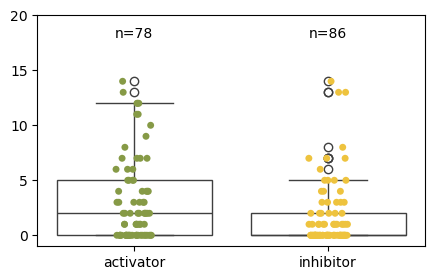

In [39]:
plt.figure(figsize=(5, 3))
a = sns.boxplot(count_interactions, color='white')
sns.stripplot(count_interactions, palette=['#869A46','#EEC33E'])
a.text(-0.1, 18, f"n={len(count_interactions['activator'])}")
a.text(0.9, 18, f"n={len(count_interactions['inhibitor'])}")

plt.ylim(-1.0, 20)
plt.savefig('all_candidates_protein_interactions_revision.png')
plt.savefig('all_candidates_protein_interactions_revision.svg')
plt.savefig('all_candidates_protein_interactions_revision.jpg')
print(stats.ranksums(count_interactions['activator'], count_interactions['inhibitor']))